## Classifying the Amazon Rainforest

Welcome back to another satellite imagery competition - these seem to be in fashion lately :) This time, unlike other recent satellite imagery competitions, we have to add tags to each image (which are segments of a larger image of the Amazon Rainforest). However, since each image can have multiple labels, that makes this a **multi-label** classification challenge as opposed to standard multi-class problem.

**And as always, if this helped you, some upvotes would be very much appreciated - that's where I get my motivation! :D**

Time to get straight into the data:

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import gc
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pal = sns.color_palette()

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

print('# File sizes')
for f in os.listdir('../input'):
    if not os.path.isdir('../input/' + f):
        print(f.ljust(30) + str(round(os.path.getsize('../input/' + f) / 1000000, 2)) + 'MB')
    else:
        sizes = [os.path.getsize('../input/'+f+'/'+x)/1000000 for x in os.listdir('../input/' + f)]
        print(f.ljust(30) + str(round(sum(sizes), 2)) + 'MB' + ' ({} files)'.format(len(sizes)))

# File sizes
.DS_Store                     0.01MB
train-jpg                     634.68MB (40479 files)
train.csv                     1.43MB


Wow, so Kaggle Kernels has the full data! (Thanks Kaggle Team! :))

Looks like we have 40k images for training, and 40k images for testing.
The jpegs are on average **15KB**, and the tifs are on average **538KB**. The JPEGs seem a little on the small side, but TIFFs look like they will retain most of the quality.

Before we open up the images, let's take a look at the `train.csv`.
## Training Data

In [7]:
df_train = pd.read_csv('../input/train.csv')
df_train.head()

,image_name,tags
0,train_0,haze primary
1,train_1,agriculture clear primary water
2,train_2,clear primary
3,train_3,clear primary
4,train_4,agriculture clear habitation primary road


Okay, so our training metadata is super basic. It looks like we are just given names and the corresponding tags. Let's parse them and do some analysis

In [10]:
labels = df_train['tags'].apply(lambda x: x.split(' '))

So it looks like we are not given much metadata, only the filenames and the corresponding tags. Let's parse these tags so that we can analyze them further.

In [11]:
labels = df_train['tags'].apply(lambda x: x.split(' '))
from collections import Counter, defaultdict
counts = defaultdict(int)
for l in labels:
    for l2 in l:
        counts[l2] += 1

data=[go.Bar(x=list(counts.keys()), y=list(counts.values()))]
layout=dict(height=800, width=800, title='Distribution of training labels')
fig=dict(data=data, layout=layout)
py.iplot(data, filename='train-label-dist')

In [12]:
# Co-occurence Matrix
com = np.zeros([len(counts)]*2)
for i, l in enumerate(list(counts.keys())):
    for i2, l2 in enumerate(list(counts.keys())):
        c = 0
        cy = 0
        for row in labels.values:
            if l in row:
                c += 1
                if l2 in row: cy += 1
        com[i, i2] = cy / c

data=[go.Heatmap(z=com, x=list(counts.keys()), y=list(counts.keys()))]
layout=go.Layout(height=800, width=800, title='Co-occurence matrix of training labels')
fig=dict(data=data, layout=layout)
py.iplot(data, filename='train-com')

It's worth noting that this co-occurence matrix shows **what percentage of the X label also has the Y label** - I think this shows more information than the standard symmetrical matrix.

We can see that the label "primary" has the highest proportion of labels.

## Images
Now, what you all came for. Let's load some of the images, and their corresponding labels.

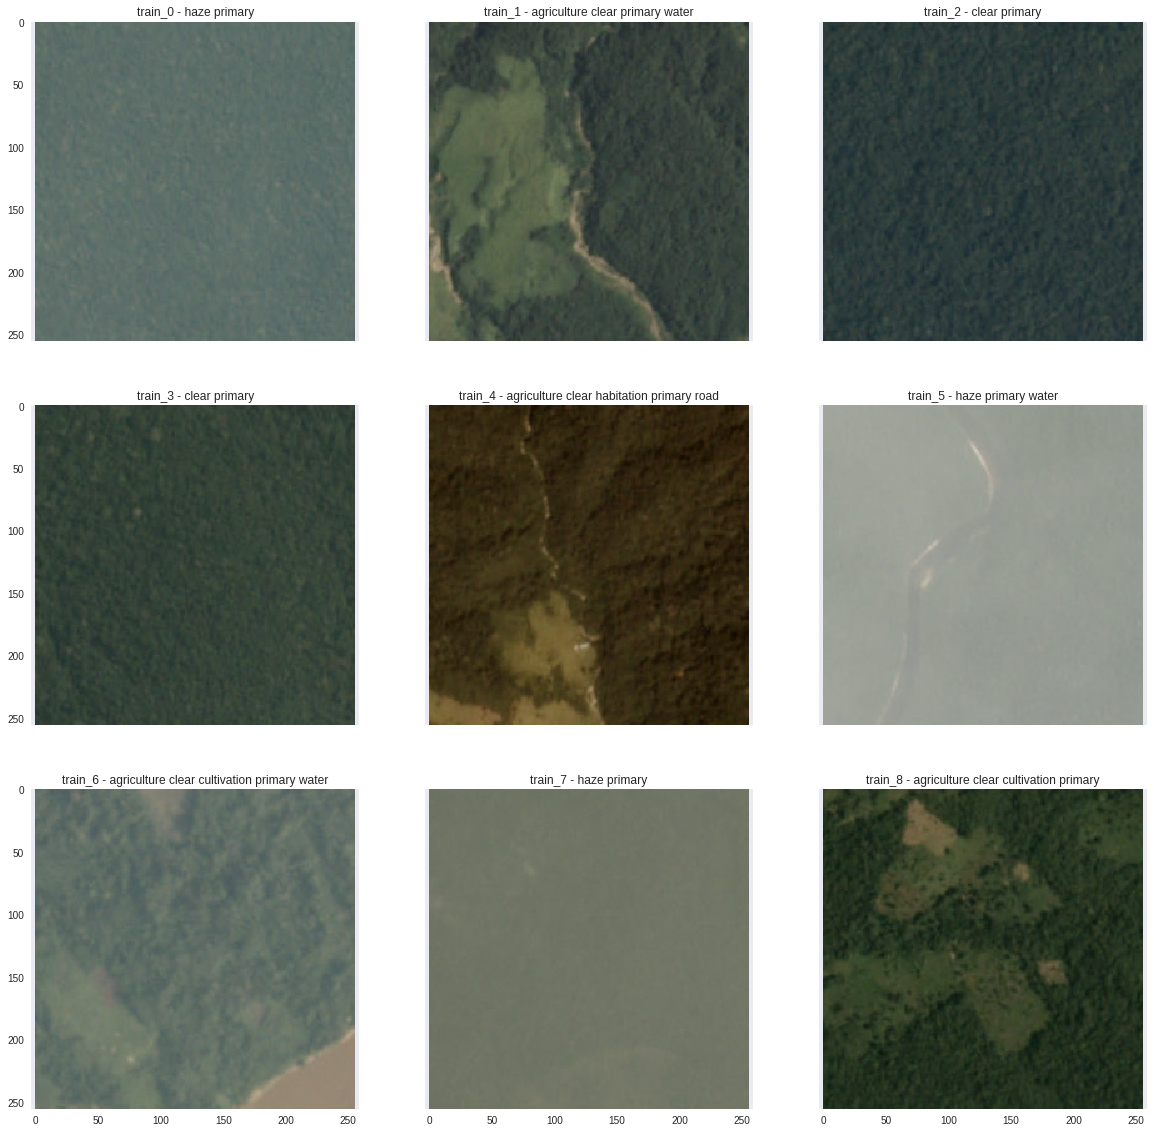

In [13]:
import cv2

new_style = {'grid': False}
plt.rc('axes', **new_style)
_, ax = plt.subplots(3, 3, sharex='col', sharey='row', figsize=(20, 20))
i = 0
for f, l in df_train[:9].values:
    img = cv2.imread('../input/train-jpg/{}.jpg'.format(f))
    ax[i // 3, i % 3].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    ax[i // 3, i % 3].set_title('{} - {}'.format(f, l))
    #ax[i // 4, i % 4].show()
    i += 1
    
plt.show()